In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
data_input = pd.read_csv('cut_program_A1.csv')

In [29]:
data_input.head()

,mat,plate_num,item_id,x_coor,y_coor,x_length,y_length
0,YW10-0218S,1,493.0,0.0,0.0,2098.0,580.0
1,YW10-0219S,1,681.0,0.0,580.0,2098.0,580.0
2,YW10-0220S,1,537.0,0.0,1160.0,2098.0,58.0
3,YW10-0221S,1,632.0,2098.0,0.0,258.0,798.0
4,YW10-0222S,1,103.0,2098.0,798.0,255.5,419.8


In [30]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mat        752 non-null    object 
 1   plate_num  752 non-null    int64  
 2   item_id    752 non-null    float64
 3   x_coor     752 non-null    float64
 4   y_coor     752 non-null    float64
 5   x_length   752 non-null    float64
 6   y_length   752 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.2+ KB


In [31]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [32]:
data_plate_group = data_input.groupby('plate_num')
end_index = data_input['plate_num'][len(data_input) - 1]

In [33]:
Test_rec = data_plate_group.get_group(1)
Test_len = len(Test_rec)
Test_rec['item_id'][0]

493.0

In [40]:
def plant_one_plate(plate_data, plate_num):
    cmap = get_cmap(Test_len)
    fig = plt.figure()
    ax_1 = fig.add_subplot(111)  # 创建子图
    plt.xlim(0, 2890)
    plt.ylim(0, 1230)
    plt.plot([2440, 2440], [0, 1220], linewidth=1, color='black')
    plt.plot([0, 2440], [1220, 1220], linewidth=1, color='black')
    for i in range(0, plate_num):
        item_id = str(int(plate_data['item_id'][i]))
        item_x = plate_data['x_coor'][i]
        item_y = plate_data['y_coor'][i]
        item_x_length = plate_data['x_length'][i]
        item_y_length = plate_data['y_length'][i]
        plt.text(item_x + item_x_length / 2, item_y + item_y_length / 2, item_id)
        rect = plt.Rectangle((item_x, item_y), item_x_length, item_y_length, color=cmap(i))  # （0.1，0.2）为左下角的坐标，0.4，0.3为宽和高，负数为反方向，红色填充
        ax_1.add_patch(rect)

In [42]:
for k in range(752):
    Test_rec = data_plate_group.get_group(k)    

SyntaxError: unexpected EOF while parsing (CreatorTemp/ipykernel_32632/703887447.py, line 1)

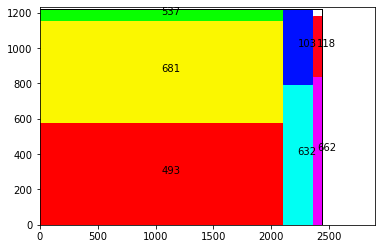

In [41]:
plant_one_plate(Test_rec, Test_len)